## This notebook is to analyze data, process it and experiment with models

In [1]:
# Importing basic libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
nltk.data.path.append(r'D:\Coding Grounds\Codsoft intern projects\Genre classifier\notebooks\nltk_data')

## 1. Getting data ready

In [3]:
with open('../data/train_data.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()
lines[:5]

['1 ::: Oscar et la dame rose (2009) ::: drama ::: Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.\n',
 '2 ::: Cupid (1997) ::: thriller ::: A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him.\n',
 '3 ::: Young, Wild and Wonderful (1980) ::: adult ::: As the bus empties the students for their field trip to the Museum of Natural History, little does the tour guide susp

#### The data is written in a pattern, id->title->year->genre->plot

In [4]:
data = []
for i in lines:
    string = i.strip().split(" ::: ")
    ID, Title, Genre, Plot = string
    data.append([ID, Title, Genre, Plot])

df_train = pd.DataFrame(data, columns = ['ID','Title','Genre','Plot'])
df_train.head()

,ID,Title,Genre,Plot
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [5]:
df_train['Year'] = df_train['Title'].str.extract(r"\((\d{4})\)") # Extracting year from title
df_train['Title'] = df_train['Title'].str.replace(r"\s*\(\d{4}\)", "", regex=True) # Replacing year with blank
df_train.head()

,ID,Title,Genre,Plot,Year
0,1,Oscar et la dame rose,drama,Listening in to a conversation between his doc...,2009
1,2,Cupid,thriller,A brother and sister with a past incestuous re...,1997
2,3,"Young, Wild and Wonderful",adult,As the bus empties the students for their fiel...,1980
3,4,The Secret Sin,drama,To help their unemployed father make ends meet...,1915
4,5,The Unrecovered,drama,The film's title refers not only to the un-rec...,2007


In [6]:
df_train = df_train[['ID', 'Title', 'Year', 'Genre', 'Plot']]
df_train.head()

,ID,Title,Year,Genre,Plot
0,1,Oscar et la dame rose,2009,drama,Listening in to a conversation between his doc...
1,2,Cupid,1997,thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful",1980,adult,As the bus empties the students for their fiel...
3,4,The Secret Sin,1915,drama,To help their unemployed father make ends meet...
4,5,The Unrecovered,2007,drama,The film's title refers not only to the un-rec...


#### Similarly for other datasets

In [7]:
with open('../data/test_data.txt', 'r', encoding = 'utf-8') as file:
    lines = file.readlines()

# Splitting the text
data = []
for i in lines:
    string = i.strip().split(' ::: ')
    ID, Title, Plot = string
    data.append([ID, Title, Plot])

# Creating dataframe
df_test = pd.DataFrame(data, columns = ['ID','Title','Plot'])

# Seperating year
df_test['Year'] = df_test['Title'].str.extract(r"\((\d{4})\)") 
df_test['Title'] = df_test['Title'].str.replace(r"\s*\(\d{4}\)", "", regex=True)

# Column order
df_test = df_test[['ID', 'Title', 'Year', 'Plot']]
df_test.head()

,ID,Title,Year,Plot
0,1,Edgar's Lunch,1998,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá,1977,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track,2010,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu,2015,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai,1955,Before he was known internationally as a marti...


In [8]:
with open('../data/test_data_solution.txt', 'r', encoding = 'utf-8') as file:
    lines = file.readlines()

# Splitting the text
data = []
for i in lines:
    string = i.strip().split(' ::: ')
    ID, Title, Genre, Plot = string
    data.append([ID, Title, Genre, Plot])

# Creating dataframe
df_test_solution = pd.DataFrame(data, columns = ['ID','Title', 'Genre', 'Plot'])

# Seperating year
df_test_solution['Year'] = df_test_solution['Title'].str.extract(r"\((\d{4})\)") 
df_test_solution['Title'] = df_test_solution['Title'].str.replace(r"\s*\(\d{4}\)", "", regex=True)

# Column order
df_test_solution = df_test_solution[['ID', 'Title', 'Year', 'Genre', 'Plot']]
df_test_solution.head()

,ID,Title,Year,Genre,Plot
0,1,Edgar's Lunch,1998,thriller,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá,1977,comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track,2010,documentary,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu,2015,drama,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai,1955,drama,Before he was known internationally as a marti...


#### All prepared datasets

In [9]:
df_train.head()

,ID,Title,Year,Genre,Plot
0,1,Oscar et la dame rose,2009,drama,Listening in to a conversation between his doc...
1,2,Cupid,1997,thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful",1980,adult,As the bus empties the students for their fiel...
3,4,The Secret Sin,1915,drama,To help their unemployed father make ends meet...
4,5,The Unrecovered,2007,drama,The film's title refers not only to the un-rec...


In [10]:
df_test.head()

,ID,Title,Year,Plot
0,1,Edgar's Lunch,1998,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá,1977,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track,2010,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu,2015,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai,1955,Before he was known internationally as a marti...


In [11]:
df_test_solution.head()

,ID,Title,Year,Genre,Plot
0,1,Edgar's Lunch,1998,thriller,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá,1977,comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track,2010,documentary,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu,2015,drama,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai,1955,drama,Before he was known internationally as a marti...


In [12]:
# Looks better in a table so...
pd.DataFrame({'Train' : df_train.isnull().sum(),'Test': df_test.isnull().sum(),'Test Sol': df_test_solution.isnull().sum()})

,Train,Test,Test Sol
Genre,0,NaN,0
ID,0,0.0,0
Plot,0,0.0,0
Title,0,0.0,0
Year,4347,4385.0,4385


Years are missing, I don't think it is needed to predict genre, it can only tell us trends during time periods. And there would be rare cases where the plot might say something but the trend would be something else. So I will be dropping them during modelling

#### Saving the clean data and copying it before use

In [13]:
df_train.to_csv("train_genre.csv", index = False)
df_test.to_csv("test_genre.csv", index = False)
df_test_solution.to_csv("test_solution_genre.csv", index = False)

# Copying data
# df_train_org = df_train -> does not create a copy, it creates a reference
df_train_org = df_train.copy()
df_test_org = df_test.copy()
df_test_solution_org = df_test_solution.copy()

The data is ready, There are no numbers, so nothing to visualize for now, we start by processing the text

## 2. Text preprocessing

After researching about things to be used in text processing, I can use nltk, spacy, textblob, etc. I'll stick to nltk for now, maybe experiment with spacy later

1. We clean the text, make it small, remove punctuations.
2. Then we tokenize
3. Then lemment it
4. Then convert into text

In [14]:
# Installing stuff from nltk only once
# import nltk
# nltk.download('punkt')      # Tokenization
# nltk.download('stopwords')  # Stopwords (in, for, the, etc.)
# nltk.download('wordnet')    # Lemmatization dictionary
# nltk.download('omw-1.4')    # Lemmatization
# nltk.download('punkt_tab')

In [15]:
# import nltk
# import os

# # Absolute path to your local nltk_data directory
# nltk_path = os.path.abspath("nltk_data")
# nltk.data.path.append(nltk_path)

# # Download required packages into this directory
# nltk.download('punkt', download_dir=nltk_path)
# nltk.download('stopwords', download_dir=nltk_path)
# nltk.download('wordnet', download_dir=nltk_path)
# nltk.download('omw-1.4', download_dir=nltk_path)


In [16]:
# Importing specific libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [17]:
# Preprocessing function for every text

lemmat = WordNetLemmatizer()  # create lemmatizer
def processing_text(text):
    text = text.lower()  # lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))  # remove punctuation using table, you can also use for loop, but this is faster
    tokens = word_tokenize(text)  # tokenize
    stop_words = set(stopwords.words('english'))  # get stopwords
    tokens = [i for i in tokens if i not in stop_words]  # remove stopwords
    tokens = [lemmat.lemmatize(i) for i in tokens]  # lemmatize
    return " ".join(tokens)  # convert back to text

# We are doing this for TF-IDF, we can also use word2vec and BERT, but let's keep it simple for now

The function is defined to process the text, now we apply this to the train and test data

In [18]:
df_train["Processed_Plot"] = df_train["Plot"].apply(processing_text)
df_test["Processed_Plot"] = df_test["Plot"].apply(processing_text)

In [19]:
df_train['Processed_Plot'][0]

'listening conversation doctor parent 10yearold oscar learns nobody courage tell week live furious refuse speak anyone except straighttalking rose lady pink meet hospital stair christmas approach rose us fantastical experience professional wrestler imagination wit charm allow oscar live life love full company friend pop corn einstein bacon childhood sweetheart peggy blue'

Finally, got nltk to run and process the text in 2 days

In [20]:
df_train['Processed_Plot'].head()

0    listening conversation doctor parent 10yearold...
1    brother sister past incestuous relationship cu...
2    bus empty student field trip museum natural hi...
3    help unemployed father make end meet edith twi...
4    film title refers unrecovered body ground zero...
Name: Processed_Plot, dtype: object

And now we turn this text into numbers, by using TF-IDF as stated in the internship task

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(max_df=0.9, min_df=3, sublinear_tf=True, norm='l2')  
x_train = tf_idf.fit_transform(df_train['Processed_Plot'])
x_test = tf_idf.transform(df_test['Processed_Plot']) 

In [37]:
x_train.shape, x_test.shape

((54214, 38906), (54200, 38906))

In [38]:
x_train 

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2505526 stored elements and shape (54214, 38906)>

In [39]:
#Splitting data
from sklearn.model_selection import train_test_split
x = x_train
y = df_train['Genre']

x_train_model, x_test_model, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [40]:
# Converting didn't do a lot, the score was same
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test) 

In [41]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # Convert sparse to dense
# x_dense = x_train.toarray()

# # Reduce to 2D
# pca = PCA(n_components=2)
# x_2d = pca.fit_transform(x_dense)

# plt.scatter(x_2d[:, 0], x_2d[:, 1], c=y_train, cmap='rainbow')
# plt.title("PCA projection of TF-IDF Vectors")
# plt.xlabel("PCA1")
# plt.ylabel("PCA2")
# plt.show()


Now that our data is ready, we import models to train, first we try the ones' mentioned in the task

In [42]:
#  Importing Logistic Regression, Naive Bayes and SVM
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
# from sklearn.linear_model import RidgeClassifier
# from sklearn.neighbors import KNeighborsClassifier

In [43]:
# Training all and testing
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced',random_state=42),
#     "Naive Bayes": MultinomialNB(),
#     "SVM": LinearSVC(class_weight='balanced'),
#     "RF": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
#     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
#     "catboost": CatBoostClassifier(verbose=0, random_state=42),
#     "Ridge": RidgeClassifier(class_weight='balanced', random_state=42),
#     "KNN": KNeighborsClassifier(n_neighbors=5)
#     }

# for name, model in models.items():
#     model.fit(x_train_model, y_train)
#     score = model.score(x_test_model, y_test)
#     print(f"{name}: {score}")

I'll be doing some data analysis, let's see what we can do better and then we go to model and tuning models

In [44]:
lgr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lgr.fit(x_train_model, y_train)
score = lgr.score(x_test_model, y_test)
score

0.5024439730701835

In [45]:
df_train['Genre'].value_counts()

Genre
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: count, dtype: int64

In [46]:
y_preds = lgr.predict(x_test_model)


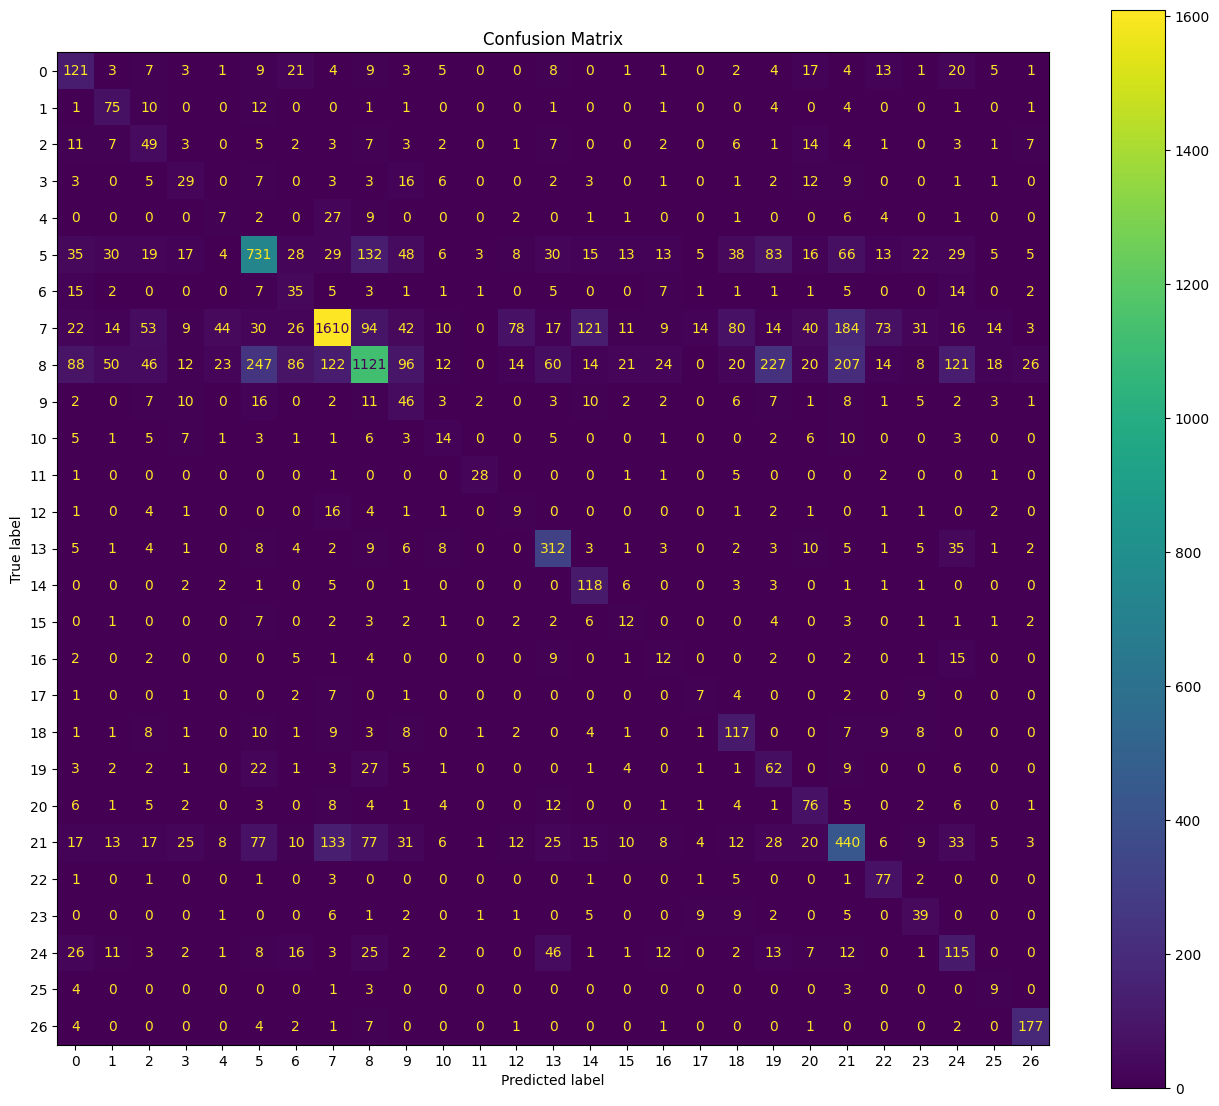

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(figsize=(16, 14))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [48]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds, target_names=encoder.classes_))

              precision    recall  f1-score   support

      action       0.32      0.46      0.38       263
       adult       0.35      0.67      0.46       112
   adventure       0.20      0.35      0.25       139
   animation       0.23      0.28      0.25       104
   biography       0.08      0.11      0.09        61
      comedy       0.60      0.51      0.55      1443
       crime       0.15      0.33      0.20       107
 documentary       0.80      0.61      0.69      2659
       drama       0.72      0.42      0.53      2697
      family       0.14      0.31      0.20       150
     fantasy       0.17      0.19      0.18        74
   game-show       0.76      0.70      0.73        40
     history       0.07      0.20      0.10        45
      horror       0.57      0.72      0.64       431
       music       0.37      0.82      0.51       144
     musical       0.14      0.24      0.18        50
     mystery       0.12      0.21      0.15        56
        news       0.16    

In [49]:
# Getting F1 score
from sklearn.metrics import f1_score

f1_macro = f1_score(y_test, y_preds, average='macro')
f1_weighted = f1_score(y_test, y_preds, average='weighted')

print("F1 Macro:", f1_macro)
print("F1 Weighted:", f1_weighted)


F1 Macro: 0.36836597792194153
F1 Weighted: 0.525937024173227
